# Global Nuclear Power Tracker - Comprehensive Exploratory Data Analysis

This notebook performs in-depth exploration of the Global Nuclear Power Tracker dataset to understand:
- Data structure, quality, and completeness
- Plant status distribution (operational, under construction, announced, cancelled)
- Capacity statistics by region, country, and status
- Timeline distribution for projecting to 2050
- Technology types and reactor models
- Investment and ownership patterns

**Date:** 2026-01-02
**Data Source:** Global Nuclear Power Tracker (September 2025)

In [1]:
# Import libraries
import sys
sys.path.append('../src')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Configure display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', 100)

# Configure plotting
%matplotlib inline
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('Set2')
plt.rcParams['figure.figsize'] = (14, 8)
plt.rcParams['font.size'] = 11

print("✅ Libraries imported successfully")
print(f"Pandas version: {pd.__version__}")
print(f"Analysis date: {datetime.now().strftime('%Y-%m-%d %H:%M')}")

✅ Libraries imported successfully
Pandas version: 2.3.0
Analysis date: 2026-01-04 16:47


## 1. Data Loading

Load the Global Nuclear Power Tracker from the 'Data' sheet.

In [2]:
# Load data from the 'Data' sheet
data_path = '../data/raw/Global-Nuclear-Power-Tracker-September-2025.xlsx'

print("Loading Excel file...")
excel_file = pd.ExcelFile(data_path)
print(f"\nAvailable sheets: {excel_file.sheet_names}")

# Load the 'Data' sheet
df = pd.read_excel(data_path, sheet_name='Data')

print(f"\n✅ Data loaded successfully from 'Data' sheet")
print(f"   Shape: {df.shape[0]:,} rows × {df.shape[1]} columns")
print(f"   Memory: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

Loading Excel file...

Available sheets: ['About', 'Data']

✅ Data loaded successfully from 'Data' sheet
   Shape: 1,749 rows × 38 columns
   Memory: 2.78 MB


## 2. Initial Data Overview

In [3]:
# Display first few rows
print("First 5 rows of the dataset:")
df.head()

First 5 rows of the dataset:


,Date Last Researched,Country/Area,Project Name,Unit Name,Project Name in Local Language / Script,Other Name(s),Capacity (MW),Status,Reactor Type,Model,Start Year,Retirement Year,Planned Retirement,Cancellation Year,Construction Start Date,First Criticality Date,First Grid Connection,Commercial Operation Date,Retirement Date,Owner,Owner Name in Local Language / Script,Operator,Operator Name in Local Language / Script,Reference Net Capacity (MW),Design Net Capacity (MW),Thermal Capacity (MWt),Latitude,Longitude,Location Accuracy,City,"Local Area (taluk, county)","Major Area (prefecture, district)",State/Province,Subregion,Region,GEM location ID,GEM unit ID,Wiki URL
0,2024-05-22,Argentina,Atucha nuclear power plant,1,NaN,Unit IV (Phase 3),362.0,operating,pressurized heavy water reactor,PHWR KWU,1974.0,NaN,NaN,NaN,1968-06-01,1974-01-13,1974-03-19,1974-06-24,NaN,Nucleoelectrica Argentina SA [100%],NaN,Nucleoelectrica Argentina,NaN,340.0,319.0,1179.0,-33.967010,-59.209500,exact,NaN,NaN,Partido de Zárate,Buenos Aires,Latin America and the Caribbean,Americas,L100000500166,G100000500502,https://www.gem.wiki/Atucha_nuclear_power_plant
1,2024-05-22,Argentina,Atucha nuclear power plant,2,NaN,Unit IV (Phase 3),745.0,operating,pressurized heavy water reactor,PHWR KWU,2016.0,NaN,NaN,NaN,1981-07-13,2014-06-02,2014-06-24,2016-05-25,NaN,Nucleoelectrica Argentina SA [100%],NaN,Nucleoelectrica Argentina,NaN,693.0,692.0,2160.0,-33.967200,-59.207300,exact,NaN,NaN,Partido de Zárate,Buenos Aires,Latin America and the Caribbean,Americas,L100000500166,G100000500382,https://www.gem.wiki/Atucha_nuclear_power_plant
2,2025-07-09,Argentina,Atucha nuclear power plant,3,NaN,Unit IV (Phase 3),1150.0,shelved,pressurized water reactor,Hualong One,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,China National Nuclear Corp [100%],中国核工业集团有限公司,Nucleoelectrica Argentina,NaN,NaN,NaN,NaN,-33.967200,-59.207500,exact,NaN,NaN,Partido de Zárate,Buenos Aires,Latin America and the Caribbean,Americas,L100000500166,G100000500646,https://www.gem.wiki/Atucha_nuclear_power_plant
3,2025-07-09,Argentina,Atucha nuclear power plant,SMR 1,NaN,Unit IV (Phase 3),300.0,announced,small modular reactor,ACR-300,2030.0,NaN,NaN,NaN,NaN,NaN,NaN,2030,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-33.968699,-59.207736,exact,Atucha,NaN,NaN,NaN,Latin America and the Caribbean,Americas,L100000500166,G100001055220,https://www.gem.wiki/Atucha_nuclear_power_plant
4,2025-07-09,Argentina,Atucha nuclear power plant,SMR 2,NaN,Unit IV (Phase 3),300.0,announced,small modular reactor,ACR-300,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-33.968699,-59.207736,exact,Atucha,NaN,NaN,NaN,Latin America and the Caribbean,Americas,L100000500166,G100001055221,https://www.gem.wiki/Atucha_nuclear_power_plant


In [4]:
# Column information
print("\n" + "="*100)
print("COLUMN INFORMATION")
print("="*100)

col_info = pd.DataFrame({
    'Column': df.columns,
    'Data Type': df.dtypes.values,
    'Non-Null Count': df.count().values,
    'Null Count': df.isna().sum().values,
    'Null %': (df.isna().sum() / len(df) * 100).values,
    'Unique Values': [df[col].nunique() for col in df.columns]
})

print(col_info.to_string(index=False))


COLUMN INFORMATION
                                  Column Data Type  Non-Null Count  Null Count    Null %  Unique Values
                    Date Last Researched    object            1749           0  0.000000             34
                            Country/Area    object            1749           0  0.000000             61
                            Project Name    object            1749           0  0.000000            571
                               Unit Name    object            1749           0  0.000000             95
 Project Name in Local Language / Script    object             366        1383 79.073756             89
                           Other Name(s)    object             500        1249 71.412236            173
                           Capacity (MW)   float64            1749           0  0.000000            395
                                  Status    object            1749           0  0.000000             10
                            Reactor Type    

In [5]:
# List all column names for easy reference
print("\n" + "="*100)
print("ALL COLUMN NAMES")
print("="*100)
for i, col in enumerate(df.columns, 1):
    print(f"{i:3}. {col}")


ALL COLUMN NAMES
  1. Date Last Researched
  2. Country/Area
  3. Project Name
  4. Unit Name
  5. Project Name in Local Language / Script
  6. Other Name(s)
  7. Capacity (MW)
  8. Status
  9. Reactor Type
 10. Model
 11. Start Year
 12. Retirement Year
 13. Planned Retirement
 14. Cancellation Year
 15. Construction Start Date
 16. First Criticality Date
 17. First Grid Connection
 18. Commercial Operation Date
 19. Retirement Date
 20. Owner
 21. Owner Name in Local Language / Script
 22. Operator
 23. Operator Name in Local Language / Script
 24. Reference Net Capacity (MW)
 25. Design Net Capacity (MW)
 26. Thermal Capacity (MWt)
 27. Latitude
 28. Longitude
 29. Location Accuracy
 30. City
 31. Local Area (taluk, county)
 32. Major Area (prefecture, district)
 33. State/Province
 34. Subregion
 35. Region
 36. GEM location ID
 37. GEM unit ID
 38. Wiki URL


## 3. Data Quality Assessment


Columns with Missing Data:
                                          Missing Count  Missing %
Retirement Year                                    1487  85.020011
Planned Retirement                                 1487  85.020011
Retirement Date                                    1487  85.020011
Project Name in Local Language / Script            1383  79.073756
Operator Name in Local Language / Script           1308  74.785592
Cancellation Year                                  1282  73.299028
Other Name(s)                                      1249  71.412236
Major Area (prefecture, district)                  1201  68.667810
City                                               1136  64.951401
Owner Name in Local Language / Script              1113  63.636364
First Grid Connection                              1093  62.492853
First Criticality Date                             1089  62.264151
Reference Net Capacity (MW)                        1039  59.405374
Design Net Capacity (MW)          

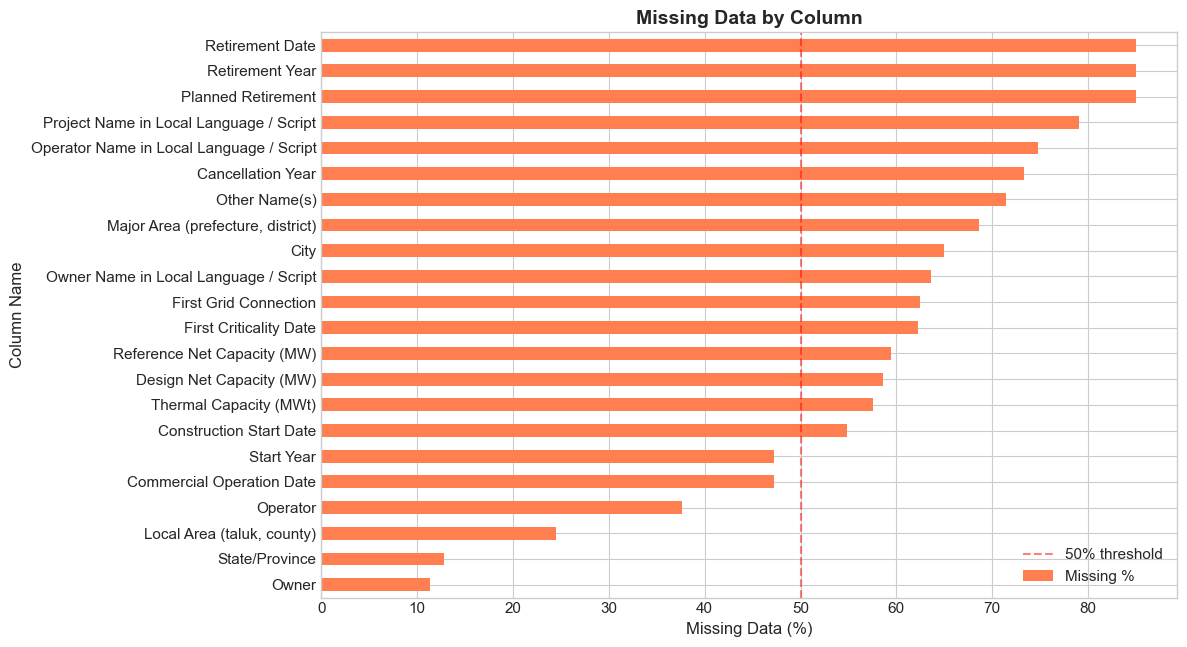

In [6]:
# Missing data visualization
missing_data = df.isna().sum().sort_values(ascending=False)
missing_pct = (missing_data / len(df) * 100)

# Show only columns with missing data
missing_df = pd.DataFrame({
    'Missing Count': missing_data[missing_data > 0],
    'Missing %': missing_pct[missing_data > 0]
})

if len(missing_df) > 0:
    print("\nColumns with Missing Data:")
    print(missing_df)
    
    # Visualize missing data
    fig, ax = plt.subplots(figsize=(12, max(6, len(missing_df) * 0.3)))
    missing_df['Missing %'].sort_values().plot(kind='barh', ax=ax, color='coral')
    ax.set_xlabel('Missing Data (%)', fontsize=12)
    ax.set_ylabel('Column Name', fontsize=12)
    ax.set_title('Missing Data by Column', fontsize=14, fontweight='bold')
    ax.axvline(x=50, color='red', linestyle='--', alpha=0.5, label='50% threshold')
    ax.legend()
    plt.tight_layout()
    plt.show()
else:
    print("\n✅ No missing data found in any column!")

## 4. Plant Status Analysis

Understanding the status of nuclear plants (operational, under construction, announced, cancelled, etc.)

Status-related columns found: ['Status']

Using column: 'Status'

Plant Status Distribution:
                          Count  Percentage
Status                                     
operating                   421   24.070898
cancelled                   312   17.838765
announced                   290   16.580903
cancelled - inferred 4 y    232   13.264723
retired                     227   12.978845
pre-construction            140    8.004574
construction                 76    4.345340
mothballed                   25    1.429388
shelved                      15    0.857633
shelved - inferred 2 y       11    0.628931


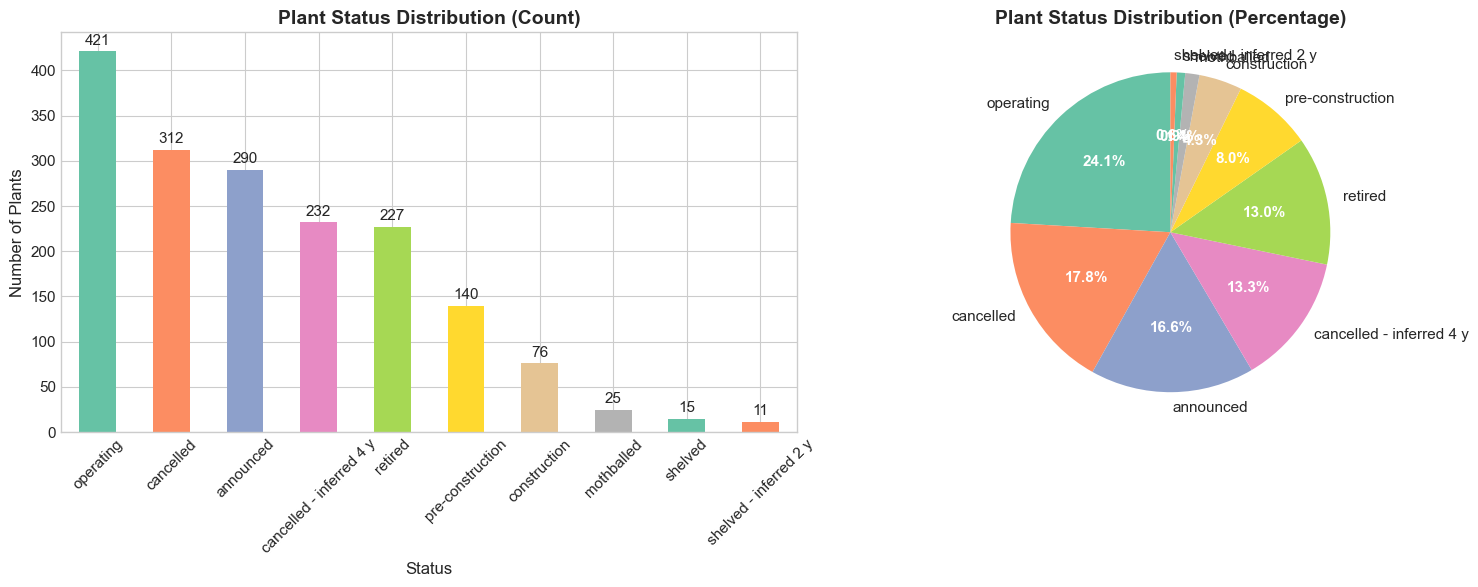


PIPELINE ANALYSIS (Future Nuclear Capacity)
Operating plants: 421 (24.1%)
Pipeline projects: 506 (28.9%)
Cancelled/Shelved: 570 (32.6%)


In [7]:
# Find status column (adapt column name as needed)
status_col = [col for col in df.columns if 'status' in col.lower()]
print(f"Status-related columns found: {status_col}")

# Use the first status column found (or manually specify)
if status_col:
    status_column = status_col[0]
    print(f"\nUsing column: '{status_column}'")
    
    # Status distribution
    status_dist = df[status_column].value_counts().sort_values(ascending=False)
    status_pct = (status_dist / len(df) * 100)
    
    status_df = pd.DataFrame({
        'Count': status_dist,
        'Percentage': status_pct
    })
    
    print("\nPlant Status Distribution:")
    print(status_df)
    
    # Visualization 1: Bar chart
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
    
    # Bar chart
    status_dist.plot(kind='bar', ax=ax1, color=sns.color_palette('Set2', len(status_dist)))
    ax1.set_title('Plant Status Distribution (Count)', fontsize=14, fontweight='bold')
    ax1.set_xlabel('Status', fontsize=12)
    ax1.set_ylabel('Number of Plants', fontsize=12)
    ax1.tick_params(axis='x', rotation=45)
    for i, v in enumerate(status_dist):
        ax1.text(i, v + max(status_dist)*0.01, str(v), ha='center', va='bottom')
    
    # Pie chart
    colors = sns.color_palette('Set2', len(status_dist))
    wedges, texts, autotexts = ax2.pie(status_dist, labels=status_dist.index, autopct='%1.1f%%',
                                         colors=colors, startangle=90)
    ax2.set_title('Plant Status Distribution (Percentage)', fontsize=14, fontweight='bold')
    for autotext in autotexts:
        autotext.set_color('white')
        autotext.set_fontweight('bold')
    
    plt.tight_layout()
    plt.show()
    
    # Pipeline analysis
    pipeline_keywords = ['announced', 'construction', 'planned', 'proposed', 'under construction', 'permitted']
    operational_keywords = ['operating', 'operational']
    cancelled_keywords = ['cancelled', 'canceled', 'shelved', 'suspended']
    
    pipeline_mask = df[status_column].str.lower().str.contains('|'.join(pipeline_keywords), na=False)
    operational_mask = df[status_column].str.lower().str.contains('|'.join(operational_keywords), na=False)
    cancelled_mask = df[status_column].str.lower().str.contains('|'.join(cancelled_keywords), na=False)
    
    print(f"\n" + "="*100)
    print("PIPELINE ANALYSIS (Future Nuclear Capacity)")
    print("="*100)
    print(f"Operating plants: {operational_mask.sum():,} ({operational_mask.sum()/len(df)*100:.1f}%)")
    print(f"Pipeline projects: {pipeline_mask.sum():,} ({pipeline_mask.sum()/len(df)*100:.1f}%)")
    print(f"Cancelled/Shelved: {cancelled_mask.sum():,} ({cancelled_mask.sum()/len(df)*100:.1f}%)")
    
else:
    print("\n⚠️ No status column found. Please check column names.")

## 5. Capacity Analysis

Analyze nuclear capacity (MW/GW) by various dimensions.

Capacity-related columns found: ['Capacity (MW)', 'Reference Net Capacity (MW)', 'Design Net Capacity (MW)', 'Thermal Capacity (MWt)']

Using column: 'Capacity (MW)'

CAPACITY STATISTICS
Total Capacity: 1,496,153 MW (1496.2 GW)
Mean Capacity: 855 MW
Median Capacity: 1,000 MW
Std Dev: 465 MW
Min Capacity: 0 MW
Max Capacity: 1,830 MW
Missing values: 0 (0.0%)


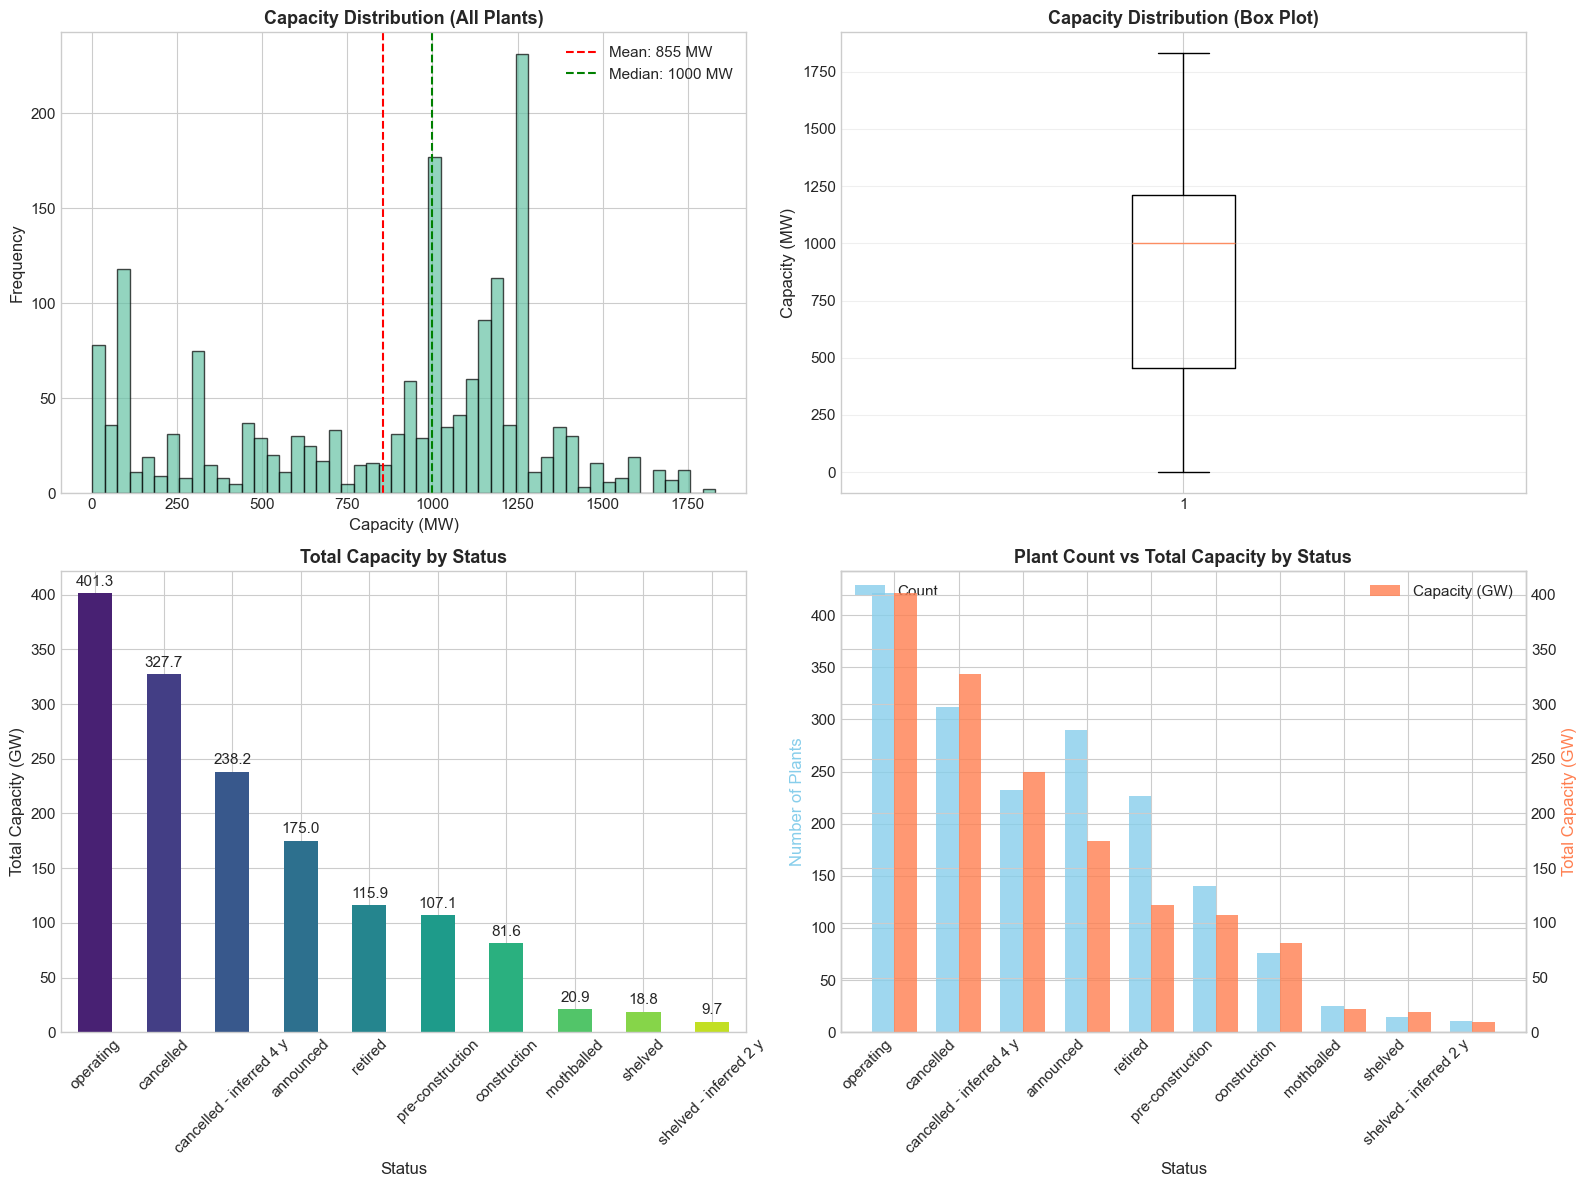

In [8]:
# Find capacity column
capacity_cols = [col for col in df.columns if any(word in col.lower() for word in ['capacity', 'mw', 'megawatt'])]
print(f"Capacity-related columns found: {capacity_cols}")

if capacity_cols:
    capacity_col = capacity_cols[0]
    print(f"\nUsing column: '{capacity_col}'")
    
    # Convert to numeric
    df['capacity_numeric'] = pd.to_numeric(df[capacity_col], errors='coerce')
    
    # Summary statistics
    print("\n" + "="*100)
    print("CAPACITY STATISTICS")
    print("="*100)
    print(f"Total Capacity: {df['capacity_numeric'].sum():,.0f} MW ({df['capacity_numeric'].sum()/1000:.1f} GW)")
    print(f"Mean Capacity: {df['capacity_numeric'].mean():,.0f} MW")
    print(f"Median Capacity: {df['capacity_numeric'].median():,.0f} MW")
    print(f"Std Dev: {df['capacity_numeric'].std():,.0f} MW")
    print(f"Min Capacity: {df['capacity_numeric'].min():,.0f} MW")
    print(f"Max Capacity: {df['capacity_numeric'].max():,.0f} MW")
    print(f"Missing values: {df['capacity_numeric'].isna().sum():,} ({df['capacity_numeric'].isna().sum()/len(df)*100:.1f}%)")
    
    # Distribution visualization
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    
    # Histogram
    axes[0, 0].hist(df['capacity_numeric'].dropna(), bins=50, edgecolor='black', alpha=0.7)
    axes[0, 0].set_xlabel('Capacity (MW)', fontsize=12)
    axes[0, 0].set_ylabel('Frequency', fontsize=12)
    axes[0, 0].set_title('Capacity Distribution (All Plants)', fontsize=13, fontweight='bold')
    axes[0, 0].axvline(df['capacity_numeric'].mean(), color='red', linestyle='--', label=f"Mean: {df['capacity_numeric'].mean():.0f} MW")
    axes[0, 0].axvline(df['capacity_numeric'].median(), color='green', linestyle='--', label=f"Median: {df['capacity_numeric'].median():.0f} MW")
    axes[0, 0].legend()
    
    # Box plot
    axes[0, 1].boxplot(df['capacity_numeric'].dropna(), vert=True)
    axes[0, 1].set_ylabel('Capacity (MW)', fontsize=12)
    axes[0, 1].set_title('Capacity Distribution (Box Plot)', fontsize=13, fontweight='bold')
    axes[0, 1].grid(axis='y', alpha=0.3)
    
    # Capacity by status (if status column exists)
    if status_col:
        capacity_by_status = df.groupby(status_column)['capacity_numeric'].sum().sort_values(ascending=False) / 1000  # Convert to GW
        capacity_by_status.plot(kind='bar', ax=axes[1, 0], color=sns.color_palette('viridis', len(capacity_by_status)))
        axes[1, 0].set_xlabel('Status', fontsize=12)
        axes[1, 0].set_ylabel('Total Capacity (GW)', fontsize=12)
        axes[1, 0].set_title('Total Capacity by Status', fontsize=13, fontweight='bold')
        axes[1, 0].tick_params(axis='x', rotation=45)
        for i, v in enumerate(capacity_by_status):
            axes[1, 0].text(i, v + max(capacity_by_status)*0.01, f"{v:.1f}", ha='center', va='bottom')
        
        # Count vs Capacity comparison by status
        count_by_status = df.groupby(status_column).size()
        ax_twin = axes[1, 1].twinx()
        
        x = np.arange(len(capacity_by_status))
        width = 0.35
        
        bars1 = axes[1, 1].bar(x - width/2, count_by_status[capacity_by_status.index], width, label='Count', alpha=0.8, color='skyblue')
        bars2 = ax_twin.bar(x + width/2, capacity_by_status, width, label='Capacity (GW)', alpha=0.8, color='coral')
        
        axes[1, 1].set_xlabel('Status', fontsize=12)
        axes[1, 1].set_ylabel('Number of Plants', fontsize=12, color='skyblue')
        ax_twin.set_ylabel('Total Capacity (GW)', fontsize=12, color='coral')
        axes[1, 1].set_title('Plant Count vs Total Capacity by Status', fontsize=13, fontweight='bold')
        axes[1, 1].set_xticks(x)
        axes[1, 1].set_xticklabels(capacity_by_status.index, rotation=45, ha='right')
        axes[1, 1].legend(loc='upper left')
        ax_twin.legend(loc='upper right')
    
    plt.tight_layout()
    plt.show()
    
else:
    print("\n⚠️ No capacity column found.")

## 6. Geographic Distribution

Analyze the distribution of nuclear projects by country and region.

Location-related columns found: ['Country/Area', 'Location Accuracy', 'Subregion', 'Region', 'GEM location ID']

Using column: 'Country/Area'

TOP 20 COUNTRIES BY NUMBER OF NUCLEAR PROJECTS
Country/Area
United States     410
China             352
Russia            126
United Kingdom     88
France             83
Japan              81
India              67
Poland             56
Canada             50
Germany            45
Ukraine            40
South Korea        38
Spain              19
Uganda             16
Czech Republic     15
Ghana              13
Sweden             13
Türkiye            12
Bulgaria           12
Switzerland        11
Name: count, dtype: int64


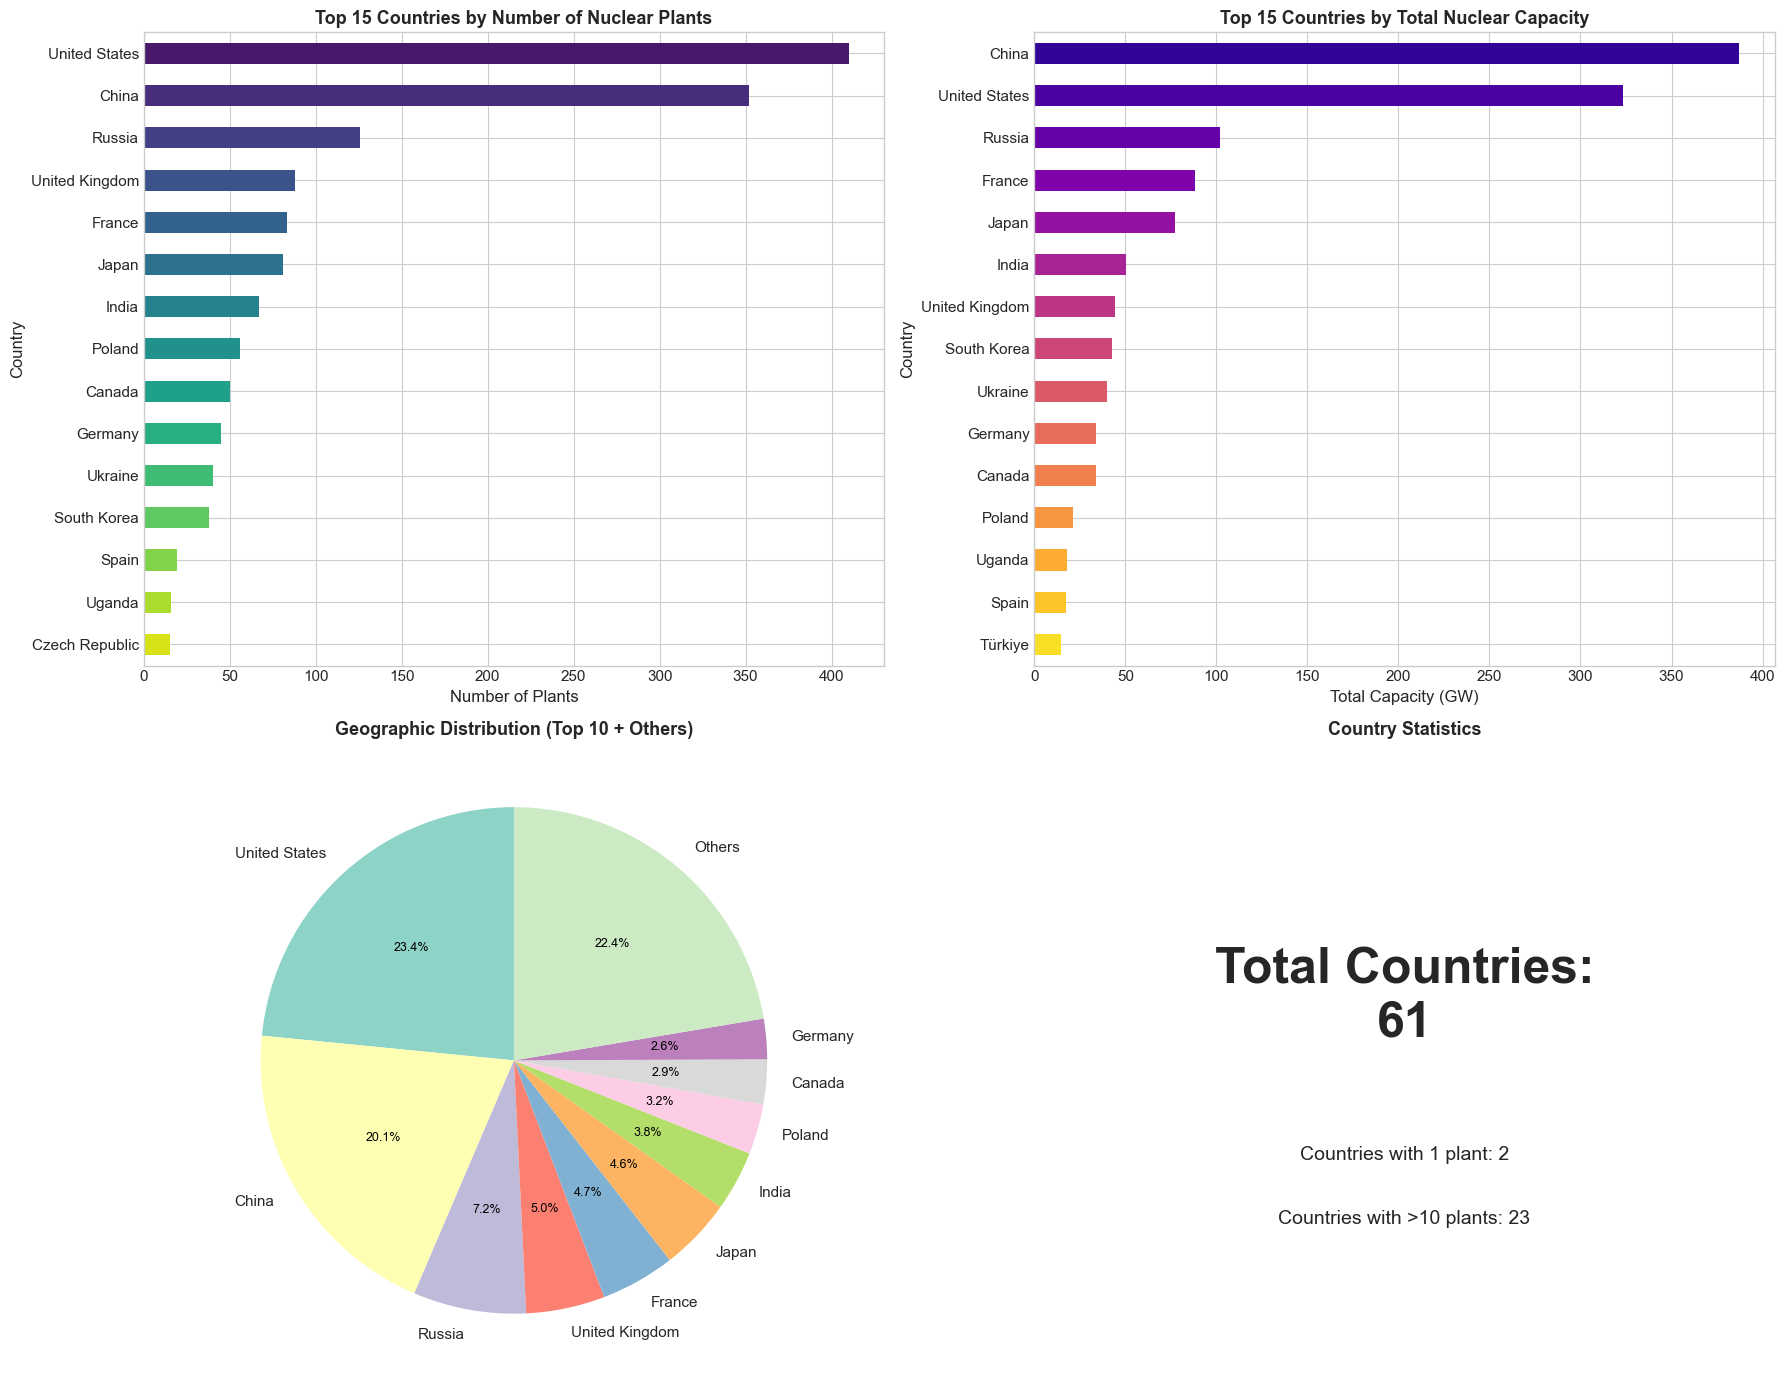

In [9]:
# Find country/region column
location_cols = [col for col in df.columns if any(word in col.lower() for word in ['country', 'nation', 'region', 'location'])]
print(f"Location-related columns found: {location_cols}")

if location_cols:
    country_col = location_cols[0]  # Use first match or manually select
    print(f"\nUsing column: '{country_col}'")
    
    # Country distribution
    country_counts = df[country_col].value_counts()
    
    print("\n" + "="*100)
    print("TOP 20 COUNTRIES BY NUMBER OF NUCLEAR PROJECTS")
    print("="*100)
    print(country_counts.head(20))
    
    # Visualizations
    fig, axes = plt.subplots(2, 2, figsize=(18, 14))
    
    # Top 15 countries by count
    country_counts.head(15).plot(kind='barh', ax=axes[0, 0], color=sns.color_palette('viridis', 15))
    axes[0, 0].set_xlabel('Number of Plants', fontsize=12)
    axes[0, 0].set_ylabel('Country', fontsize=12)
    axes[0, 0].set_title('Top 15 Countries by Number of Nuclear Plants', fontsize=13, fontweight='bold')
    axes[0, 0].invert_yaxis()
    
    # Top countries by total capacity (if capacity column exists)
    if capacity_cols:
        country_capacity = df.groupby(country_col)['capacity_numeric'].sum().sort_values(ascending=False) / 1000  # GW
        country_capacity.head(15).plot(kind='barh', ax=axes[0, 1], color=sns.color_palette('plasma', 15))
        axes[0, 1].set_xlabel('Total Capacity (GW)', fontsize=12)
        axes[0, 1].set_ylabel('Country', fontsize=12)
        axes[0, 1].set_title('Top 15 Countries by Total Nuclear Capacity', fontsize=13, fontweight='bold')
        axes[0, 1].invert_yaxis()
    
    # Pie chart - Top 10 countries
    top10_countries = country_counts.head(10)
    others_count = country_counts[10:].sum()
    pie_data = pd.concat([top10_countries, pd.Series({'Others': others_count})])
    
    colors = sns.color_palette('Set3', len(pie_data))
    wedges, texts, autotexts = axes[1, 0].pie(pie_data, labels=pie_data.index, autopct='%1.1f%%',
                                                colors=colors, startangle=90)
    axes[1, 0].set_title('Geographic Distribution (Top 10 + Others)', fontsize=13, fontweight='bold')
    for autotext in autotexts:
        autotext.set_fontsize(9)
        autotext.set_color('black')
    
    # Country count distribution
    total_countries = df[country_col].nunique()
    axes[1, 1].text(0.5, 0.6, f"Total Countries:\n{total_countries}", 
                    ha='center', va='center', fontsize=36, fontweight='bold')
    axes[1, 1].text(0.5, 0.35, f"Countries with 1 plant: {(country_counts == 1).sum()}", 
                    ha='center', va='center', fontsize=14)
    axes[1, 1].text(0.5, 0.25, f"Countries with >10 plants: {(country_counts > 10).sum()}", 
                    ha='center', va='center', fontsize=14)
    axes[1, 1].set_xlim(0, 1)
    axes[1, 1].set_ylim(0, 1)
    axes[1, 1].axis('off')
    axes[1, 1].set_title('Country Statistics', fontsize=13, fontweight='bold')
    
    plt.tight_layout()
    plt.show()
    
else:
    print("\n⚠️ No country/location column found.")

## 7. Timeline Analysis

Analyze project timelines for projecting to 2050.

In [10]:
# Find year/date columns
year_cols = [col for col in df.columns if any(word in col.lower() for word in ['year', 'date', 'start', 'operational', 'construction', 'announced'])]
print(f"Year/Date columns found: {year_cols}")

if year_cols:
    print("\nExamining year columns:")
    for col in year_cols[:5]:  # Show first 5
        print(f"\n{col}:")
        print(f"  Sample values: {df[col].dropna().head(10).tolist()}")
        print(f"  Data type: {df[col].dtype}")
        print(f"  Non-null count: {df[col].notna().sum()}")

Year/Date columns found: ['Date Last Researched', 'Start Year', 'Retirement Year', 'Cancellation Year', 'Construction Start Date', 'First Criticality Date', 'Commercial Operation Date', 'Retirement Date']

Examining year columns:

Date Last Researched:
  Sample values: ['2024-05-22', '2024-05-22', '2025-07-09', '2025-07-09', '2025-07-09', '2025-07-09', '2025-07-09', '2025-07-09', '2024-05-22', '2024-05-20']
  Data type: object
  Non-null count: 1749

Start Year:
  Sample values: [1974.0, 2016.0, 2030.0, 1984.0, 1977.0, 1980.0, 2025.0, 2021.0, 2023.0, 1962.0]
  Data type: float64
  Non-null count: 923

Retirement Year:
  Sample values: [1989.0, 2026.0, 1987.0, 2022.0, 2035.0, 2023.0, 2035.0, 2002.0, 2002.0, 2006.0]
  Data type: float64
  Non-null count: 262

Cancellation Year:
  Sample values: [1978.0, 2013.0, 1986.0, 1988.0, 1988.0, 2023.0, 2023.0, 1991.0, 1991.0, 2009.0]
  Data type: float64
  Non-null count: 467

Construction Start Date:
  Sample values: ['1968-06-01', '1981-07-13', 

## 8. Technology and Reactor Analysis

Analyze reactor types, technology, and suppliers.

In [11]:
# Find technology-related columns
tech_cols = [col for col in df.columns if any(word in col.lower() for word in ['reactor', 'technology', 'type', 'model', 'design', 'vendor', 'supplier'])]
print(f"Technology-related columns found: {tech_cols}")

if tech_cols:
    print("\nExamining technology columns:")
    for col in tech_cols[:3]:  # Show first 3
        print(f"\n{col}:")
        value_counts = df[col].value_counts()
        print(f"  Unique values: {df[col].nunique()}")
        print(f"  Top 10 values:")
        print(value_counts.head(10))

Technology-related columns found: ['Reactor Type', 'Model', 'Design Net Capacity (MW)']

Examining technology columns:

Reactor Type:
  Unique values: 17
  Top 10 values:
Reactor Type
pressurized water reactor          941
boiling water reactor              190
unknown                            187
small modular reactor              141
pressurized heavy water reactor     89
gas-cooled reactor                  58
high temperature gas reactor        41
light water graphite reactor        34
fast breeder reactor                24
microreactor                        10
Name: count, dtype: int64

Model:
  Unique values: 200
  Top 10 values:
Model
unknown                          459
AP-1000                          113
HPR-1000                          64
NuScale                           60
BWRX-300                          42
CAP1000                           38
MAGNOX                            30
VVER V-320                        29
VVER V-213                        25
Horizontal Pres

## 9. Cross-Tabulation Analysis

Analyze relationships between key dimensions.


STATUS BY COUNTRY (Top 10 Countries)
Status          announced  cancelled  cancelled - inferred 4 y  construction  mothballed  operating  pre-construction  retired  shelved  shelved - inferred 2 y   All
Country/Area                                                                                                                                                         
Canada                  9         13                         0             0           0         19                 2        6        1                       0    50
China                  53          0                       185            33           0         58                23        0        0                       0   352
France                  4          5                         0             0           0         57                 2       15        0                       0    83
Germany                 0          9                         0             0           0          0                 0       36      

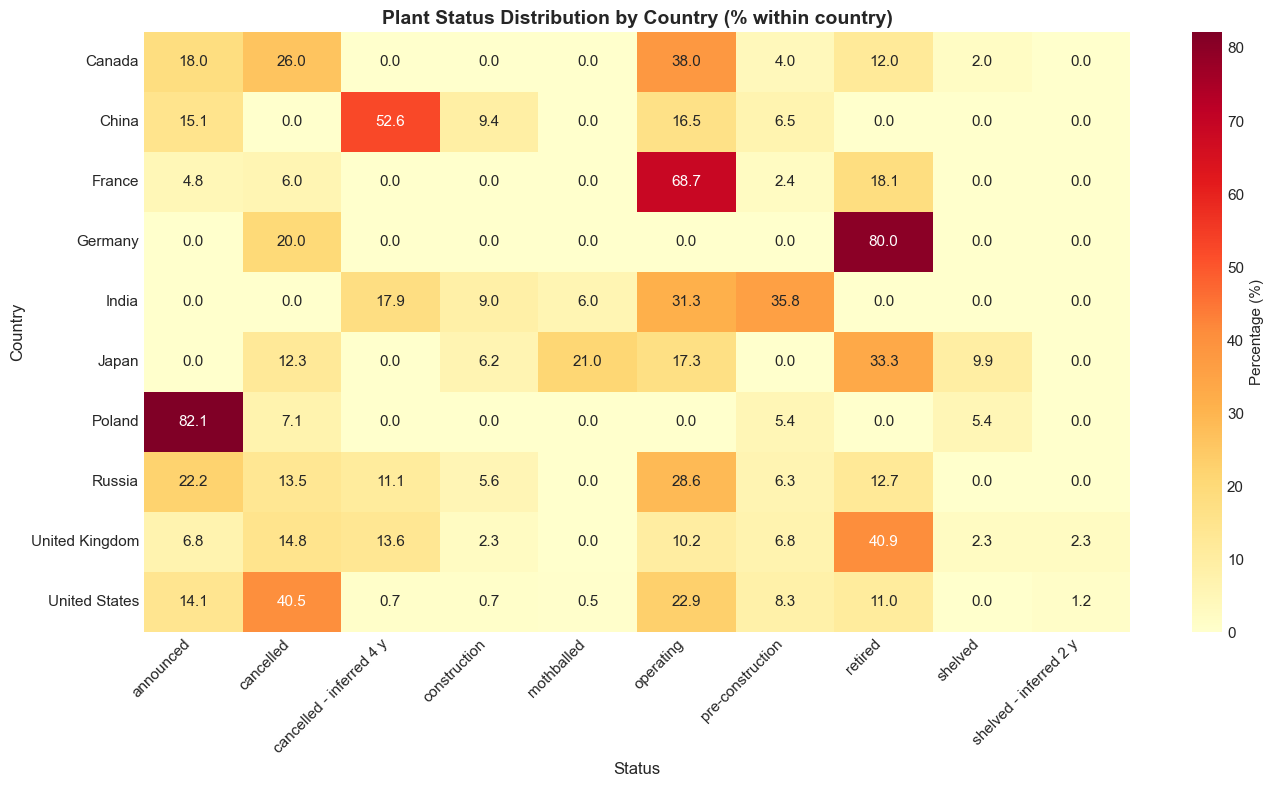

In [12]:
# Status by Country (Top 10 countries)
if status_col and location_cols:
    top_countries = df[country_col].value_counts().head(10).index
    df_top = df[df[country_col].isin(top_countries)]
    
    crosstab = pd.crosstab(df_top[country_col], df_top[status_column], margins=True)
    print("\n" + "="*100)
    print("STATUS BY COUNTRY (Top 10 Countries)")
    print("="*100)
    print(crosstab)
    
    # Heatmap visualization
    plt.figure(figsize=(14, 8))
    crosstab_pct = pd.crosstab(df_top[country_col], df_top[status_column], normalize='index') * 100
    sns.heatmap(crosstab_pct, annot=True, fmt='.1f', cmap='YlOrRd', cbar_kws={'label': 'Percentage (%)'})
    plt.title('Plant Status Distribution by Country (% within country)', fontsize=14, fontweight='bold')
    plt.xlabel('Status', fontsize=12)
    plt.ylabel('Country', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

## 10. Pipeline Projects for 2050 Projection

Focus on announced and under-construction projects for future projections.


PIPELINE PROJECTS ANALYSIS (For 2050 Projection)
Total pipeline projects: 506
Total pipeline capacity: 363.7 GW

Top 15 Countries by Pipeline Capacity:
                Count  Total Capacity (MW)  Total Capacity (GW)
Country/Area                                                   
China             109             124914.0              124.914
Russia             43              32164.0               32.164
India              30              31480.0               31.480
Uganda             16              18000.0               18.000
Poland             49              15612.0               15.612
United States      95              15435.0               15.435
Türkiye            12              14700.0               14.700
France              6               9900.0                9.900
Kazakhstan          8               9600.0                9.600
United Kingdom     14               8860.0                8.860
Ukraine             7               8428.0                8.428
Iran           

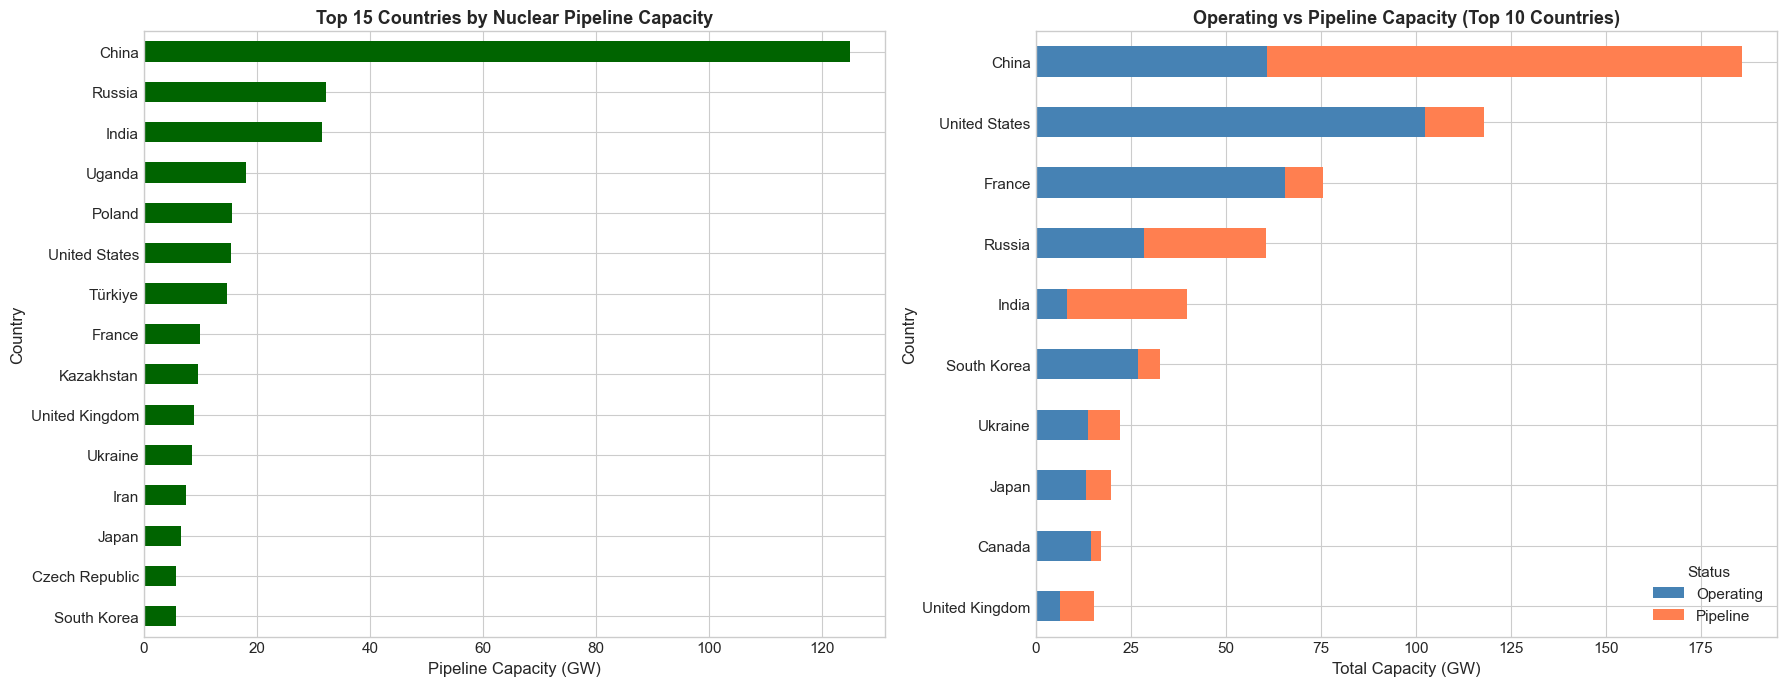

In [13]:
if status_col:
    # Filter for pipeline projects
    pipeline_df = df[pipeline_mask].copy()
    
    print("\n" + "="*100)
    print("PIPELINE PROJECTS ANALYSIS (For 2050 Projection)")
    print("="*100)
    print(f"Total pipeline projects: {len(pipeline_df):,}")
    
    if capacity_cols and len(pipeline_df) > 0:
        total_pipeline_capacity = pipeline_df['capacity_numeric'].sum() / 1000  # GW
        print(f"Total pipeline capacity: {total_pipeline_capacity:.1f} GW")
        
        # Pipeline by country
        pipeline_by_country = pipeline_df.groupby(country_col).agg({
            'capacity_numeric': ['count', 'sum']
        }).round(0)
        pipeline_by_country.columns = ['Count', 'Total Capacity (MW)']
        pipeline_by_country['Total Capacity (GW)'] = pipeline_by_country['Total Capacity (MW)'] / 1000
        pipeline_by_country = pipeline_by_country.sort_values('Total Capacity (GW)', ascending=False)
        
        print("\nTop 15 Countries by Pipeline Capacity:")
        print(pipeline_by_country.head(15))
        
        # Visualization
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 7))
        
        # Pipeline capacity by country
        pipeline_by_country['Total Capacity (GW)'].head(15).plot(kind='barh', ax=ax1, color='darkgreen')
        ax1.set_xlabel('Pipeline Capacity (GW)', fontsize=12)
        ax1.set_ylabel('Country', fontsize=12)
        ax1.set_title('Top 15 Countries by Nuclear Pipeline Capacity', fontsize=13, fontweight='bold')
        ax1.invert_yaxis()
        
        # Operating vs Pipeline comparison (top 10 countries)
        operating_df = df[operational_mask].copy()
        operating_capacity = operating_df.groupby(country_col)['capacity_numeric'].sum() / 1000
        pipeline_capacity = pipeline_df.groupby(country_col)['capacity_numeric'].sum() / 1000
        
        # Combine and get top 10 by total
        total_capacity = (operating_capacity.fillna(0) + pipeline_capacity.fillna(0)).sort_values(ascending=False).head(10)
        
        comparison_df = pd.DataFrame({
            'Operating': operating_capacity[total_capacity.index].fillna(0),
            'Pipeline': pipeline_capacity[total_capacity.index].fillna(0)
        })
        
        comparison_df.plot(kind='barh', stacked=True, ax=ax2, color=['steelblue', 'coral'])
        ax2.set_xlabel('Total Capacity (GW)', fontsize=12)
        ax2.set_ylabel('Country', fontsize=12)
        ax2.set_title('Operating vs Pipeline Capacity (Top 10 Countries)', fontsize=13, fontweight='bold')
        ax2.legend(title='Status', loc='lower right')
        ax2.invert_yaxis()
        
        plt.tight_layout()
        plt.show()

## 11. Summary Statistics and Key Findings

In [14]:
print("\n" + "="*100)
print("SUMMARY STATISTICS")
print("="*100)

print(f"\nDataset Overview:")
print(f"  Total records: {len(df):,}")
print(f"  Total countries: {df[country_col].nunique() if location_cols else 'N/A'}")

if capacity_cols:
    print(f"\nCapacity Overview:")
    print(f"  Total global capacity: {df['capacity_numeric'].sum()/1000:.1f} GW")
    print(f"  Operating capacity: {operating_df['capacity_numeric'].sum()/1000:.1f} GW" if 'operating_df' in locals() else "  N/A")
    print(f"  Pipeline capacity: {pipeline_df['capacity_numeric'].sum()/1000:.1f} GW" if 'pipeline_df' in locals() else "  N/A")

if status_col:
    print(f"\nStatus Overview:")
    for status in status_dist.head(5).index:
        count = status_dist[status]
        pct = status_pct[status]
        print(f"  {status}: {count:,} ({pct:.1f}%)")

print("\n" + "="*100)
print("KEY FINDINGS FOR 2050 PROJECTION")
print("="*100)
print("\n[Add your findings here after running the analysis]")
print("\n1. Pipeline capacity available for 2050: [X] GW")
print("2. Top growth regions: [List]")
print("3. Technology trends: [Summary]")
print("4. Data quality notes: [Issues to address]")
print("5. Next steps: Compare against IEA Net Zero scenarios")


SUMMARY STATISTICS

Dataset Overview:
  Total records: 1,749
  Total countries: 61

Capacity Overview:
  Total global capacity: 1496.2 GW
  Operating capacity: 401.3 GW
  Pipeline capacity: 363.7 GW

Status Overview:
  operating: 421 (24.1%)
  cancelled: 312 (17.8%)
  announced: 290 (16.6%)
  cancelled - inferred 4 y: 232 (13.3%)
  retired: 227 (13.0%)

KEY FINDINGS FOR 2050 PROJECTION

[Add your findings here after running the analysis]

1. Pipeline capacity available for 2050: [X] GW
2. Top growth regions: [List]
3. Technology trends: [Summary]
4. Data quality notes: [Issues to address]
5. Next steps: Compare against IEA Net Zero scenarios


## 12. Save Processed Data

In [15]:
import os

# Save the cleaned dataset
output_path = 'notebooks/nuclear_tracker_cleaned.csv'
os.makedirs(os.path.dirname(output_path), exist_ok=True)
df.to_csv(output_path, index=False)
print(f"✅ Data saved to: {output_path}")
print(f"   {len(df):,} rows × {len(df.columns)} columns")

# Save pipeline projects separately
if 'pipeline_df' in locals() and len(pipeline_df) > 0:
    pipeline_path = 'notebooks/nuclear_pipeline_projects.csv'
    pipeline_df.to_csv(pipeline_path, index=False)
    print(f"\n✅ Pipeline projects saved to: {pipeline_path}")
    print(f"   {len(pipeline_df):,} rows")

✅ Data saved to: notebooks/nuclear_tracker_cleaned.csv
   1,749 rows × 39 columns

✅ Pipeline projects saved to: notebooks/nuclear_pipeline_projects.csv
   506 rows
